## 6.2 Exercise ## 

## CONTENTS ##

## 1. Importing Visualization Libraries and Data## 2. Pick out variables from the data set suitable for exploratory visual analysis
## 3. Create a correlation matrix heatmap (colored)
## 4. Create scatterplots for the variables with the strongest correlations and examine the nature of their relationship
## 5. Create a pair plot of the entire data 
## 6. Create a categorical plot and interpret the result
## 7. Revisit the questions generated in the previous task and write answers to those I  can based on the exploration ## 8. Define any hypotheses that I can at this point



## 1. Importing Visualization Libraries and Data

# IMPORT LIBRARIES

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# CREATE A PATH TO MAIN FOLDER

In [35]:
path = r'C:\Users\João Pedro\EXERCISES EXAMPLE PYTHON\World Happiness Report'

In [36]:
path

'C:\\Users\\João Pedro\\EXERCISES EXAMPLE PYTHON\\World Happiness Report'

# IMPORT CLEAN DATASET

In [37]:
df_report = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged_years.csv'), sep=';' , index_col = False)

In [38]:
df_report.head()

,Country,Year,Happiness_Rank,Happiness_Score,GDP_Capita,Family,Life_Expectancy,Freedom,Gov_Trust,Generosity,Region,Dystopia Residual,Standard Error,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low
0,Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,Western Europe,2.51738,0.03411,NaN,NaN,NaN,NaN
1,Iceland,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,Western Europe,2.70201,0.04884,NaN,NaN,NaN,NaN
2,Denmark,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Western Europe,2.49204,0.03328,NaN,NaN,NaN,NaN
3,Norway,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,Western Europe,2.46531,0.03880,NaN,NaN,NaN,NaN
4,Canada,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,North America,2.45176,0.03553,NaN,NaN,NaN,NaN


In [39]:
df_report.tail()

,Country,Year,Happiness_Rank,Happiness_Score,GDP_Capita,Family,Life_Expectancy,Freedom,Gov_Trust,Generosity,Region,Dystopia Residual,Standard Error,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low
777,Rwanda,2019,152,3.334,0.359,0.711,0.614,0.555,0.411,0.217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
778,Tanzania,2019,153,3.231,0.476,0.885,0.499,0.417,0.147,0.276,NaN,NaN,NaN,NaN,NaN,NaN,NaN
779,Afghanistan,2019,154,3.203,0.350,0.517,0.361,0.000,0.025,0.158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
780,Central African Republic,2019,155,3.083,0.026,0.000,0.105,0.225,0.035,0.235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
781,South Sudan,2019,156,2.853,0.306,0.575,0.295,0.010,0.091,0.202,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df_report.count()

Country                      782
Year                         782
Happiness_Rank               782
Happiness_Score              782
GDP_Capita                   782
Family                       782
Life_Expectancy              782
Freedom                      782
Gov_Trust                    781
Generosity                   782
Region                       315
Dystopia Residual            470
Standard Error               158
Lower Confidence Interval    157
Upper Confidence Interval    157
Whisker.high                 155
Whisker.low                  155
dtype: int64

In [41]:
df_report.shape

(782, 17)

In [42]:
df_report.columns

Index(['Country', 'Year', 'Happiness_Rank', 'Happiness_Score', 'GDP_Capita',
       'Family', 'Life_Expectancy', 'Freedom', 'Gov_Trust', 'Generosity',
       'Region', 'Dystopia Residual', 'Standard Error',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Whisker.high', 'Whisker.low'],
      dtype='object')

## 2. Pick out variables from the data set suitable for exploratory visual analysis.

# DROP THE UNNEEDED COLUMNS AND CREATE A DATA SUBSET

In [43]:
report_sub = df_report.drop(['Country', 'Region', 'Year','Standard Error', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Whisker.high', 'Whisker.low','Dystopia Residual'], axis =1)

In [44]:
report_sub.head()

,Happiness_Rank,Happiness_Score,GDP_Capita,Family,Life_Expectancy,Freedom,Gov_Trust,Generosity
0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [45]:
report_sub.count()

Happiness_Rank     782
Happiness_Score    782
GDP_Capita         782
Family             782
Life_Expectancy    782
Freedom            782
Gov_Trust          781
Generosity         782
dtype: int64

## 3. Create a correlation matrix heatmap (colored).

# Creatte correlation table 

In [46]:
report_sub.corr()

,Happiness_Rank,Happiness_Score,GDP_Capita,Family,Life_Expectancy,Freedom,Gov_Trust,Generosity
Happiness_Rank,1.000000,-0.992066,-0.794791,-0.644842,-0.743655,-0.537942,-0.372781,-0.117713
Happiness_Score,-0.992066,1.000000,0.789284,0.648799,0.742456,0.551258,0.398418,0.137578
GDP_Capita,-0.794791,0.789284,1.000000,0.585966,0.784338,0.340511,0.306307,-0.014560
Family,-0.644842,0.648799,0.585966,1.000000,0.572650,0.420361,0.126401,-0.037262
Life_Expectancy,-0.743655,0.742456,0.784338,0.572650,1.000000,0.340745,0.250512,0.010638
Freedom,-0.537942,0.551258,0.340511,0.420361,0.340745,1.000000,0.459593,0.290706
Gov_Trust,-0.372781,0.398418,0.306307,0.126401,0.250512,0.459593,1.000000,0.318920
Generosity,-0.117713,0.137578,-0.014560,-0.037262,0.010638,0.290706,0.318920,1.000000


# Creating subplot using matplotlib
# Creating matrix heatmap using seaborn

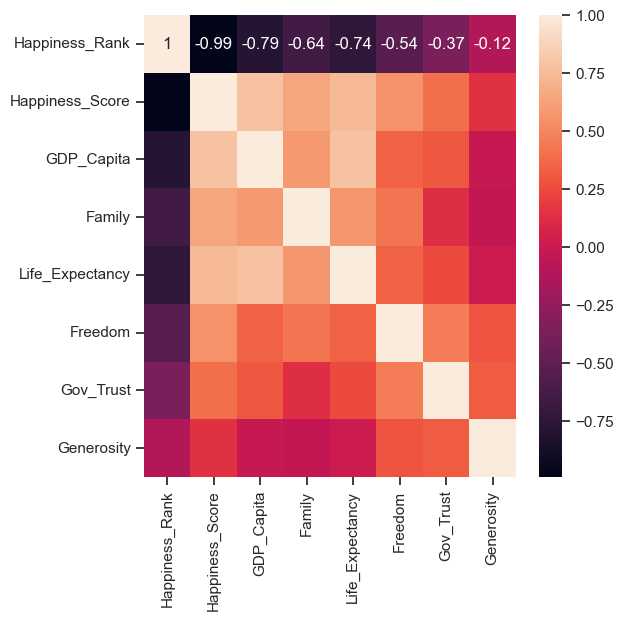

In [47]:
f,ax = plt.subplots(figsize=(6,6))
corr = sns.heatmap(report_sub.corr(), annot = True, ax = ax)

In [ ]:
plt.savefig('heatmap.png')

## The happiness rank and happiness score exhibit a nearly perfect inverse correlation, where higher happiness scores correspond to lower happiness ranks (with 1 representing the highest). This relationship holds true across all variables in the distribution, highlighting their near exact opposition due to the strong inverse correlation. Notably, variables such as GDP per capita, Family, Life expectancy, and Freedom demonstrate a robust positive correlation with high happiness scores. Conversely, weaker correlations are observed between happiness scores and variables such as Government Trust and Generosity. ##

## 4. Create scatterplots for the variables with the strongest correlations and examine the nature of their relationships.

# Scatterplot of most correlated variables
# GDP per capita and happiness scatterplo #t

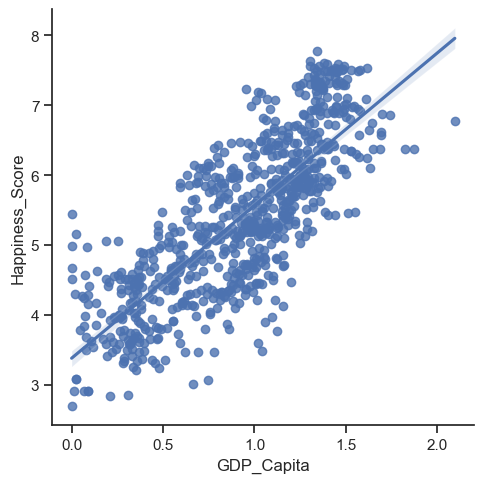

In [48]:
sns.lmplot(x = 'GDP_Capita', y = 'Happiness_Score', data = df_report)

# Family and happiness scatterplot

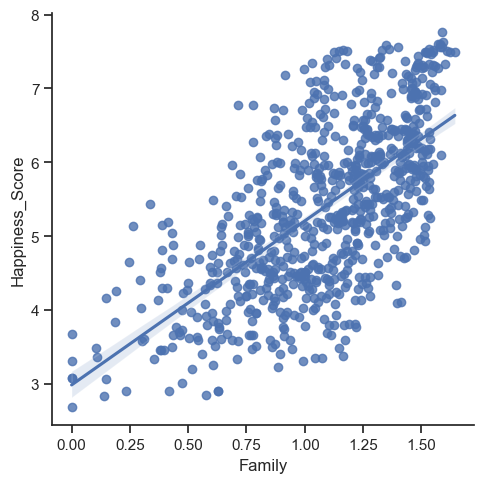

In [49]:
sns.lmplot(x = 'Family', y = 'Happiness_Score', data = df_report)

# Life expectancy and happiness scatterplot

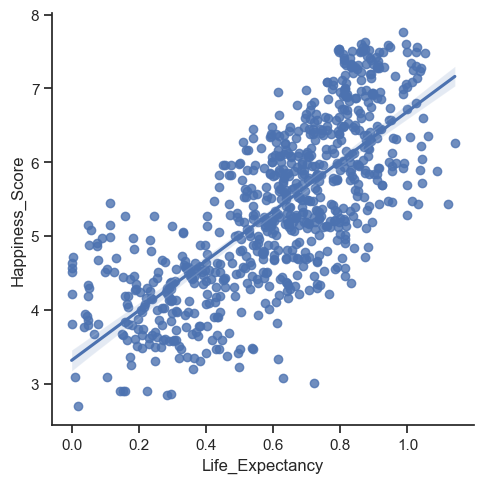

In [50]:
sns.lmplot(x = 'Life_Expectancy', y = 'Happiness_Score', data = df_report)

## The scatterplots effectively portray the significant correlations observed between GDP per capita, family, life expectancy, and the overall happiness score of a country ##

In [51]:
pd.option_context('mode.use_inf_as_na', True)

## 5. Create a pair plot of the entire data set.

C:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

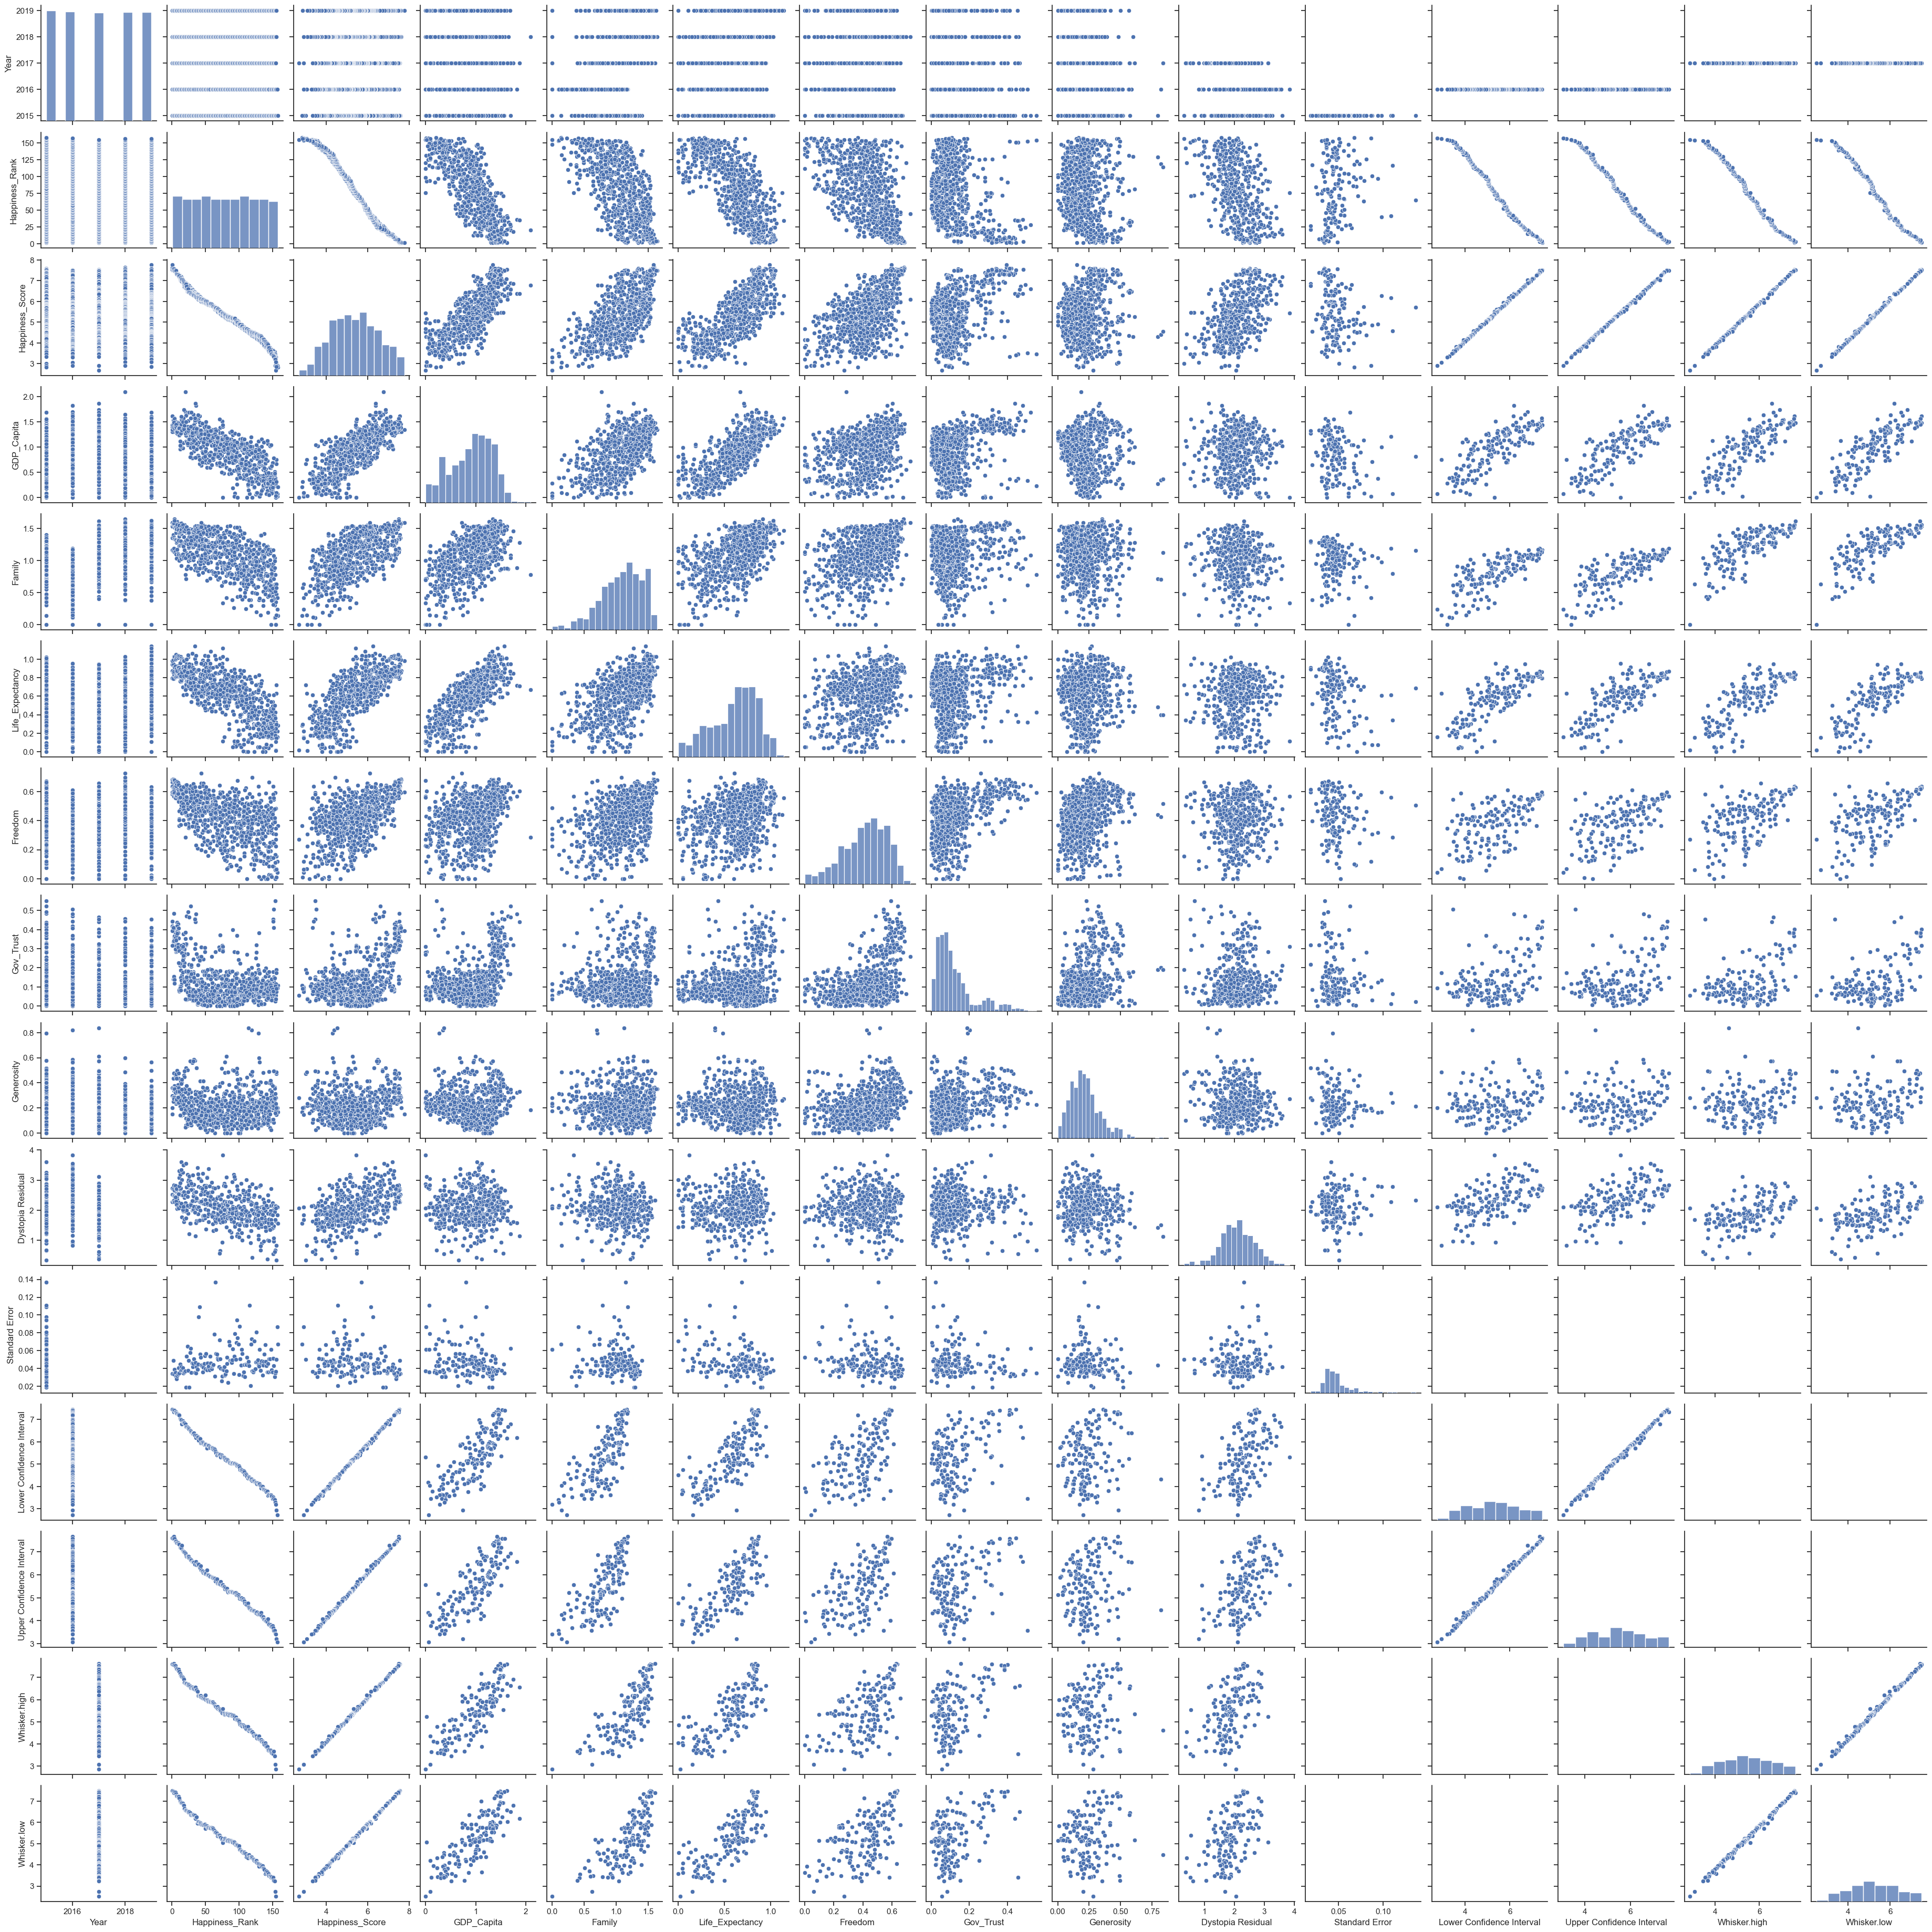

In [52]:
pair_plot = sns.pairplot(df_report)

# Creating smaller subsection to see just strongest variables

In [53]:
happiness_sub_strong = report_sub.drop(['Dystopia Residual', 'Generosity', 'Gov_Trust', 'Freedom'], axis = 1)
pair_plot_strong = sns.pairplot(happiness_sub_strong)

KeyError: "['Dystopia Residual'] not found in axis"

# Creating subset for just weakly correlated variables

In [ ]:
happiness_sub_weak = report_sub.drop(['Family', 'GDP_Capita', 'Life_Expectancy'], axis = 1)
pair_plot_weak = sns.pairplot(happiness_sub_weak)

## The pair plot, as anticipated, showcased robust correlations among all variables. Particularly intriguing were the connections observed between freedom and both happiness score and government trust. Exploring further, I'm curious about the variables that display less pronounced correlations with a country's happiness score.##

## 6. Create a categorical plot and interpret the results

# Creating a histogram to see distribution

In [ ]:
sns.histplot(df_report['Happiness_Score'], bins = 10, kde = True)

# Creating score category for categorical plot

In [ ]:
df_report.loc[df_report['Happiness_Score'] < 4.5 , 'Score Category'] = 'Low score'
df_report.loc[(df_report['Happiness_Score'] >= 4.5) & (df_report['Happiness_Score'] < 6.5), 'Score Category'] = 'Medium score'
df_report.loc[df_report['Happiness_Score'] >= 6.5, 'Score Category'] = 'High score'

In [ ]:
df_report['Score Category'].value_counts(dropna= False)

# Creating categorical plot with GDP per Capita

In [ ]:
sns.set(style="ticks")
cat_plot_GDP = sns.catplot(x='GDP_Capita', y='Happiness_Score', hue="Score Category", data=df_report)

# Creating categorical plot with Family

In [ ]:
sns.set(style="ticks")
cat_plot_Family = sns.catplot(x='Family', y='Happiness_Score', hue="Score Category", data=df_report)

# Creating categorical plot with life expectancy

In [ ]:
sns.set(style="ticks")
cat_plot_Life_Expectancy = sns.catplot(x='Life_Expectancy', y='Happiness_Score', hue="Score Category", data=df_report)

# Creating categorical plot with Freedom

In [ ]:
sns.set(style="ticks")
cat_plot_Freedom = sns.catplot(x='Freedom', y='Happiness_Score', hue="Score Category", data=df_report)

# Creating categorical plot with Gov_Trust

In [ ]:
sns.set(style="ticks")
cat_plot_Gov_Trust = sns.catplot(x='Gov_Trust', y='Happiness_Score', hue="Score Category", data=df_report)

# Creating categorical plot with generosity

In [ ]:
sns.set(style="ticks")
cat_plot_Gov_Trust = sns.catplot(x='Generosity', y='Happiness_Score', hue="Score Category", data=df_report)

 ## I generated categorical plots for various variables to facilitate comparison. Interestingly, every categorical plot distinctly delineates between low, middle, and high happiness scores, indicating a clear separation. Notably, there seem to be no significant outliers present across variables in this dataset. Such consistency might be expected, given that the creators of this data employed algorithms to determine portions of the happiness score. ## 

## 7. Revisit the questions generated in the previous task and write answers to those I  can based on the exploration so far.

# I was able to see that the happiness levels are not that influenced by the social support(Family) because they are similar to the other variables. 
And also that Freedom and the Absence of corruption have a massive influence on the happiness levels. #
Im still unable to answer to following questions: 

2) Which countries consistently rank highest for overall happiness, and what factors contribute 
to their high rankings?
3) How does perception of corruption correlate with happiness scores across different nations?
5) Can visualizations illustrate how happiness levels differ across continents or regions?
6) How does life expectancy relate to happiness scores in different countrbally?

## 8. Define any hypotheses that I can at this point.

Hypothesis - Countries with high levels of social support, economic stability, and life expectancy tend to have higher happiness scores in the World Happiness Report.
Null hypothesis - Countries with high levels of social support, economic stability, and life expectancy do not necessarily have higher happiness scores in the World Happiness Report.

Hypothesis - The level of corruption perception, governmental transparency, and freedom of expression significantly influence a country's ranking in the World Happiness Report.
Null hypothesis - The level of corruption perception, governmental transparency, and freedom of expression do not significantly impact a country's ranking in the World Happiness Rep

Hypothesis: The happiness scores for specific countries within the dataset (2015-2019) remain relatively stable over time.
Null hypothesis: The happiness scores for specific countries within the dataset (2015-2019) exhibit significant variation across the years.ort.